In [1]:

from PollenDataAnalyzer import PollenDataAnalyzer
%pip install tqdm


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# %pip install pandas
# %pip install matplotlib
# from PollenDataAnalyzer import PollenDataAnalyzer

# TODOS !!!!
# should we change the itensity_mapping, it seem kind of werid that it's all low and high
# 


In [3]:
#!!!download and Change the data_path for your own "dataset-for-roi/cleaned_status_intensity_observation_data.csv" path on your local computer
#also download and change the land_cover_path
#these path are for KATHY!!
analyzer = PollenDataAnalyzer(
    data_path="/Applications/Home/2025 Spring/GEOG398E/Project data/dataset-for-roi/cleaned_status_intensity_observation_data.csv",  # or the raw CSV
    mapping_path="../intensity_mapping.json",
    Phenophase_path="../Phenophase.json", 
    land_cover_path ="/Applications/Home/2025 Spring/GEOG398E/Project data/table_2021_counties_max.xlsx - table_2021_counties_max.csv"

)

In [4]:
#first 2 column
analyzer.df.head(2)

,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,...,Observation_Date,Day_of_Year,Intensity_Category_ID,Intensity_Value,Site_Visit_ID,AGDD,Tmax,Prcp,Accum_Prcp,Daylength
0,0,0,0,0,0,0,0,0,0,0,...,2014-04-06,96,39,high,61281,599.75,19.0,0.0,315.0,45274
1,1,1,1,1,1,1,1,1,1,1,...,2014-04-11,101,39,high,61777,667.00,24.5,0.0,336.0,45965


In [5]:
#checking to see all the unique Phenophases
#we would only want the "Reproductive phenophases" that is in Phenophase.json
analyzer.df["Phenophase_Description"].unique()

array(['Breaking leaf buds', 'Ripe fruits', 'Increasing leaf size',
       'Leaves', 'Colored leaves', 'Flowers or flower buds',
       'Open flowers', 'Recent fruit or seed drop', 'Fruits',
       'Pollen release (flowers)', 'Unripe seed cones', 'Ripe seed cones',
       'Breaking needle buds (conifers)', 'Young needles (conifers)',
       'Pollen cones (conifers)', 'Recent cone or seed drop',
       'Open pollen cones (conifers)', 'Pollen release (conifers)',
       'Emerging needles (pines)', 'Flower heads (grasses/sedges)',
       'Open flowers (grasses/sedges)', 'Young needles (pines)',
       'Young leaves (tree/shrub)', 'Leaves (grasses)', 'Leaves (sedges)',
       'Breaking needle buds (deciduous)', 'Needles (deciduous)',
       'Colored needles', 'Leaves (rushes)'], dtype=object)

In [6]:
#with all the correct mapping of the Phenophases
#make self.df pollen only and store it in pollen_df
analyzer.pollen_only()

Pollen-only dataset created with 31935 rows.
Original dataset has 239023 rows.


In [7]:
#using the pollen_df to convert only the correct phenophase data with corresponding lag_long to county ideas
#https://geo.fcc.gov/api/census/#!/area/get_area
#this will take 1-3 minutues max
# and also store a copy to Kathy's personal path (LINE 169 to delete it or change it to your own path)
analyzer.lag_long_to_county()

Fetching county FIPS codes in parallel...


Progress:  92%|█████████▏| 29535/31935 [01:23<00:05, 417.29it/s]

Error fetching FIPS for (35.587788, -83.076012): HTTPSConnectionPool(host='geo.fcc.gov', port=443): Max retries exceeded with url: /api/census/area?lat=35.587788&lon=-83.076012&censusYear=2020&format=json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x12d8302b0>: Failed to resolve 'geo.fcc.gov' ([Errno 8] nodename nor servname provided, or not known)"))


Progress: 100%|██████████| 31935/31935 [01:28<00:00, 359.65it/s]


Finished fetching county FIPS codes.
        Observation_ID  ObservedBy_Person_ID   Latitude  Longitude State  \
109            7674014                  2749  35.648930 -78.816948    NC   
110            9894514                  2749  35.648930 -78.816948    NC   
111            9959272                  2749  35.648930 -78.816948    NC   
112           10053832                  2749  35.648930 -78.816948    NC   
113           10705250                  2749  35.648930 -78.816948    NC   
...                ...                   ...        ...        ...   ...   
238988        51909771                 77249  39.033443 -77.018204    MD   
238989        51961948                 77249  39.033443 -77.018204    MD   
238990        52064280                 77249  39.033443 -77.018204    MD   
239009        51959969                 74062  35.167660 -81.056870    NC   
239016        52067610                 45694  39.009678 -77.095146    MD   

        Species_ID  Individual_ID  Phenophase_ID  

In [8]:
analyzer.add_land_cover_info("/Applications/Home/2025 Spring/GEOG398E/Project data/table_2021_counties_max.xlsx - table_2021_counties_max.csv")

Land cover types added using hash table.
    county_fips        land_cover_type
109       37183  Developed, open space
110       37183  Developed, open space
111       37183  Developed, open space
112       37183  Developed, open space
113       37183  Developed, open space


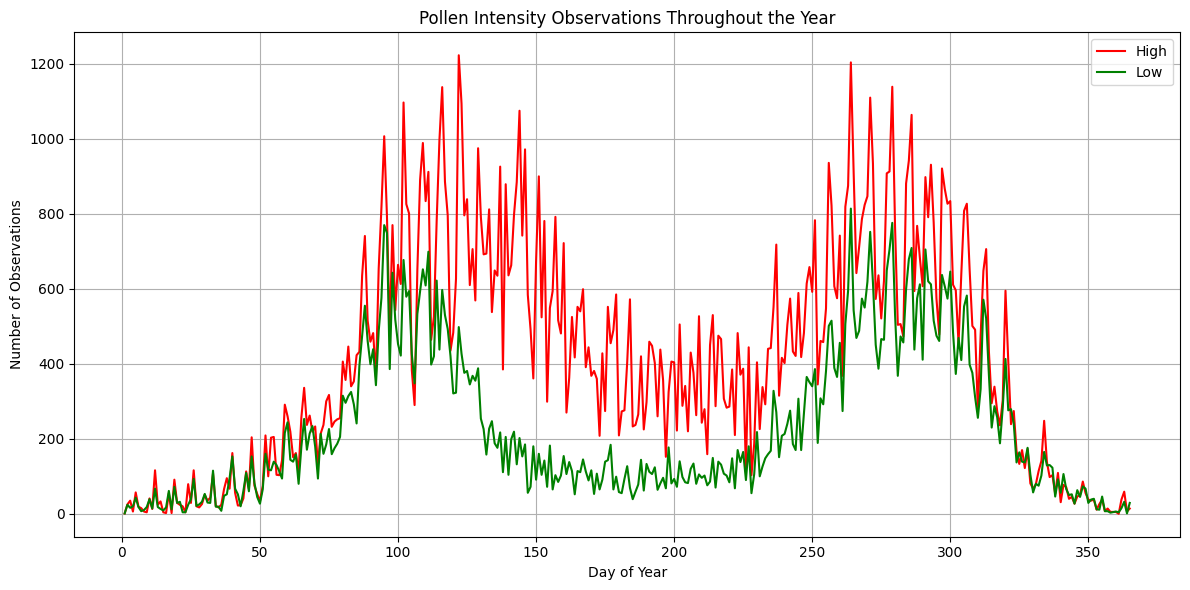

In [9]:
analyzer.plot_intensity_counts()

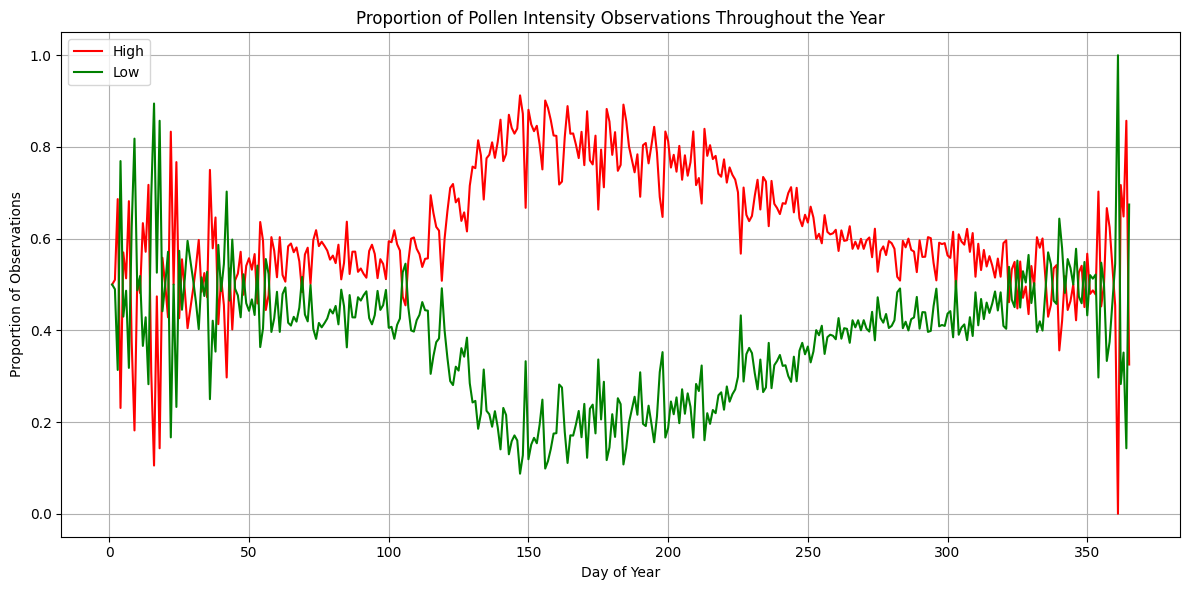

In [10]:
analyzer.plot_normalized_intensity()

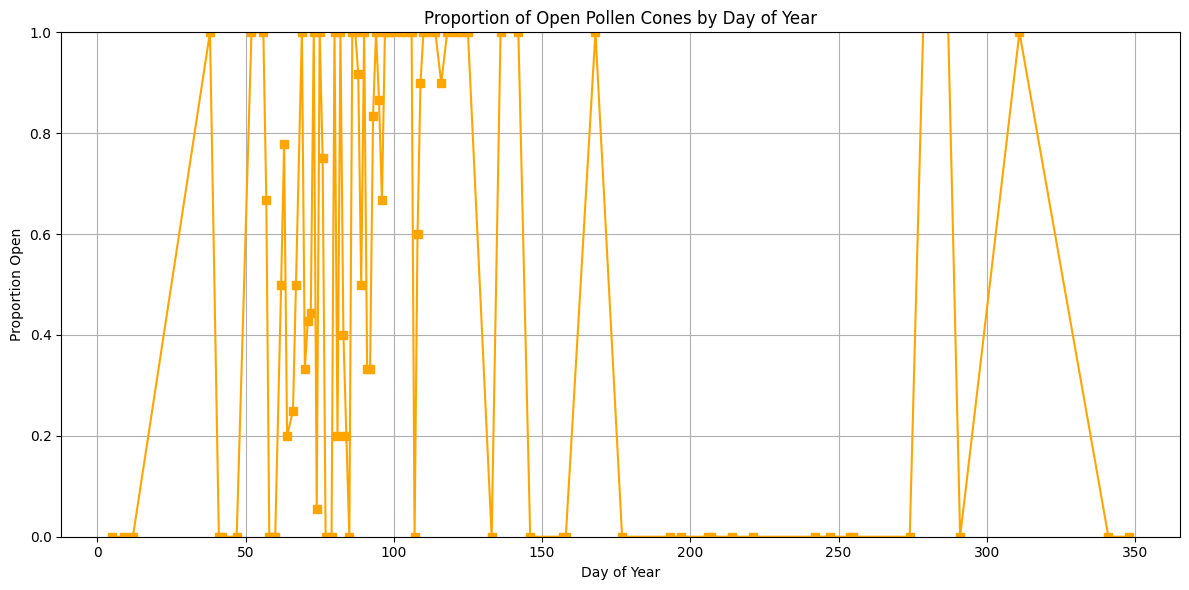

In [11]:
analyzer.plot_open_pollen_cones()